## Código para poder usar la GPU
Si no la tienes deberia uncionar sin problema igual

In [1]:
import tensorflow as tf
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

2023-03-06 10:33:25.883625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:33:25.999410: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 10:33:26.421759: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/victorxesus.barreiro/anaconda3/envs/deepgpu4/lib/
2023-03-06 10:33:26.421832: W tensorflow/

In [2]:
import tensorflow as tf

# Obtener la lista de dispositivos físicos disponibles
devices = tf.config.list_physical_devices('GPU')

if len(devices) > 0:
  # Configurar TensorFlow para usar la primera GPU disponible
  tf.config.set_visible_devices(devices[0], 'GPU')
  print('Se utilizará la GPU:', devices[0])
else:
  print('No se encontraron dispositivos GPU disponibles.')

Se utilizará la GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2023-03-06 10:33:26.831496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:26.842837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:26.842911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import tensorflow as tf

print("Dispositivo actual: ", tf.test.gpu_device_name())

Dispositivo actual:  /device:GPU:0


2023-03-06 10:33:26.861284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:33:26.862054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:26.862138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:26.862177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

# Cargamos los datos

In [4]:
# Dataset path
from os import listdir
import os.path

PATH = './faces_dataset_train/'
PATH_TEST = './faces_dataset_test/'

assert os.path.exists(PATH), 'Verify the above commands'
assert os.path.exists(PATH_TEST), 'Verify the above commands'

### Metadata access

In [5]:
import json

with open(PATH + 'metadata.json') as fIn:
    metadata = json.loads(fIn.read())
with open(PATH_TEST + 'metadata.json') as fIn:
    metadata_test = json.loads(fIn.read())

metadata_example_key = next(iter(metadata.keys()))
metadata_example_value = metadata[metadata_example_key]

print(metadata_example_key, end=' ----> ')
print(metadata_example_value)

i07/nm0322407_rm852269056_1955-3-29_2005.jpg ----> {'age': 50, 'gender': 'M'}


### Image reading

In [6]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

2023-03-06 10:33:27.488144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:27.488232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:27.488271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:27.488341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 10:33:27.488380: I tensorflow/compiler/xla/stream_executo

<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Image shape:  (32, 32, 3)
Label:  1


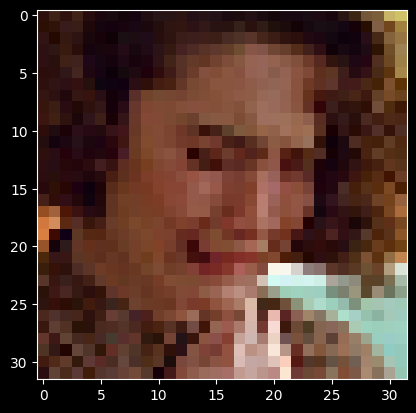

Image shape:  (32, 32, 3)
Label:  0


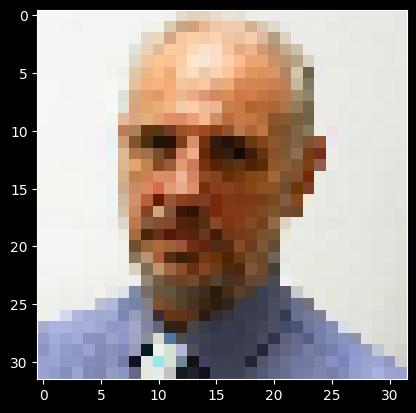

Image shape:  (32, 32, 3)
Label:  0


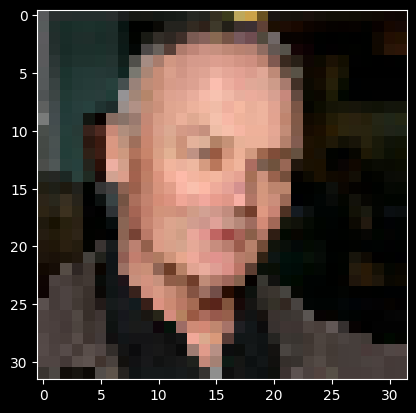

Image shape:  (32, 32, 3)
Label:  0


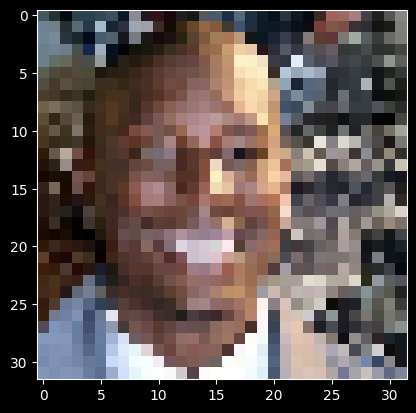

Image shape:  (32, 32, 3)
Label:  1


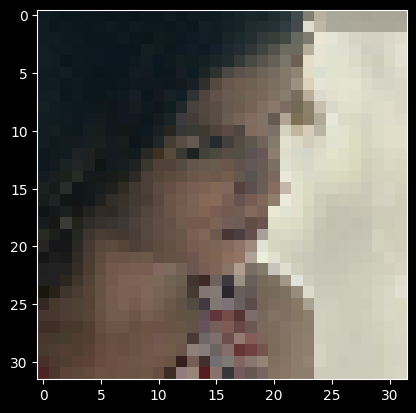

In [7]:
import tensorflow as tf
from matplotlib import pyplot

# Size at which images will be processed
img_height = 32
img_width = 32

def decode_img(img):
    '''Transforms a string that represents the path of an image into a matrix
    (img_height, img_width, 3) of uint8 representing the pixel values
    '''
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # Resize the image to the desired size.
    return tf.cast(tf.image.resize(img, [img_height, img_width]),tf.uint8)

# def process_path_age(file_path):
#     '''Transforma cadenas de la forma 'ruta|edad|genero' a tuplas (imagen, etiqueta)
#     '''
#     parts = tf.strings.split(file_path, '|')
#     age = parts[1]
#     age = tf.strings.to_number(age, out_type=tf.dtypes.int32)
#     gender = parts[2]
#     # Load the raw data from the file as a string
#     img = tf.io.read_file(parts[0])
#     img = decode_img(img)
#     return img, age

def process_path(file_path):
    '''Transforms strings of the form 'path|age|gender' to tuples (image, label)
    '''
    parts = tf.strings.split(file_path, '|')
    print(parts)
    gender = tf.cast(0 if parts[2] == 'M' else 1, tf.dtypes.int32)
    # Load the raw data from the file as a string
    img = tf.io.read_file(parts[0])
    img = decode_img(img)
    return img, gender

def format_metadata(m, path):
    '''Transforms the metadata dictionary m into a list of strings of the form 'path to the image|age|gender'.
    '''
    return list(map(lambda x: '{0}{1}|{2}|{3}'.format(path,x,m[x]['age'],m[x]['gender']),m.keys()))

# We build a dataset of text strings from the metadata
train_metadata = format_metadata(metadata, PATH)
train_ds = tf.data.Dataset.from_tensor_slices(train_metadata)
print(train_ds.take(1))

# Mapping to an image dataset with tags
train_ds = train_ds.shuffle(len(train_ds)).map(process_path)

# Same process for test
test_ds = tf.data.Dataset.from_tensor_slices(format_metadata(metadata_test, PATH_TEST))
test_ds = test_ds.map(process_path)

# Checking
for image, label in train_ds.take(5):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
    pyplot.imshow(image.numpy())
    pyplot.show()

In [8]:
ds_train_transform = train_ds
ds_test_transform = test_ds
print(train_metadata[0])

./faces_dataset_train/i07/nm0322407_rm852269056_1955-3-29_2005.jpg|50|M


# OPTIONAL: rescaling input to [-1, 1]
ds_train_transform = ds_train_transform.map(lambda image, label: (tf.cast(image, tf.float32)/127.5 - 1., label))
ds_test_transform = ds_test_transform.map(lambda image, label: (tf.cast(image, tf.float32)/127.5 - 1., label))

# OPTIONAL: sample gender weights
import numpy as np
labels = [0 if x.split('|')[2] == 'M' else 1 for x in train_metadata]
freqs = np.array([1. - np.mean(labels), np.mean(labels)])
i_freqs = 1. / freqs
sample_weights = tf.convert_to_tensor(len(i_freqs) * i_freqs / i_freqs.sum())
print(sample_weights)
ds_train_transform = ds_train_transform.map(lambda image, label: (image, label, sample_weights[label]))
ds_test_transform = ds_test_transform.map(lambda image, label: (image, label, sample_weights[label]))

In [9]:
batch_size = 128
ds_train_batch = ds_train_transform.batch(batch_size)
ds_test_batch = ds_test_transform.batch(batch_size)

# Funciones auxiliares

In [10]:
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

def visualize_fit(history):
    """Procedure to print de evolution of a training process.

    Args:
        history (dict): _description_
    """    
    history_dict = history.history
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def fitModel(model, ds_train, ds_val, num_epochs=20, monitor='val_loss'):
    checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor=monitor, mode='auto', verbose=0)
    history = model.fit(ds_train, verbose = 1, epochs=num_epochs, callbacks=[checkpoint], validation_data=ds_val)
    result = model.evaluate(ds_val)
    print(result)
    visualize_fit(history)
    return result

# Funciones auxiliares

In [11]:
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

def visualize_fit(history):
    """Procedure to print de evolution of a training process.

    Args:
        history (dict): _description_
    """    
    history_dict = history.history
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def fitModel(model, ds_train, ds_val, num_epochs=20, monitor='val_loss'):
    checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor=monitor, mode='auto', verbose=0)
    history = model.fit(ds_train, verbose = 1, epochs=num_epochs, callbacks=[checkpoint], validation_data=ds_val)
    result = model.evaluate(ds_val)
    print(result)
    visualize_fit(history)
    return result

# Funciones auxiliares

In [12]:
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

def visualize_fit(history):
    """Procedure to print de evolution of a training process.

    Args:
        history (dict): _description_
    """    
    history_dict = history.history
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def fitModel(model, ds_train, ds_val, num_epochs=20, monitor='val_loss', callbacks=[]):
    checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor=monitor, mode='auto', verbose=0)
    history = model.fit(ds_train, verbose = 1, epochs=num_epochs, callbacks=callbacks+[checkpoint], validation_data=ds_val)
    result = model.evaluate(ds_val)
    print(result)
    visualize_fit(history)
    return result

# Models

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18432     
                                                                 
 batch_normalization_6 (Batc  (None, 13, 13, 64)       256 

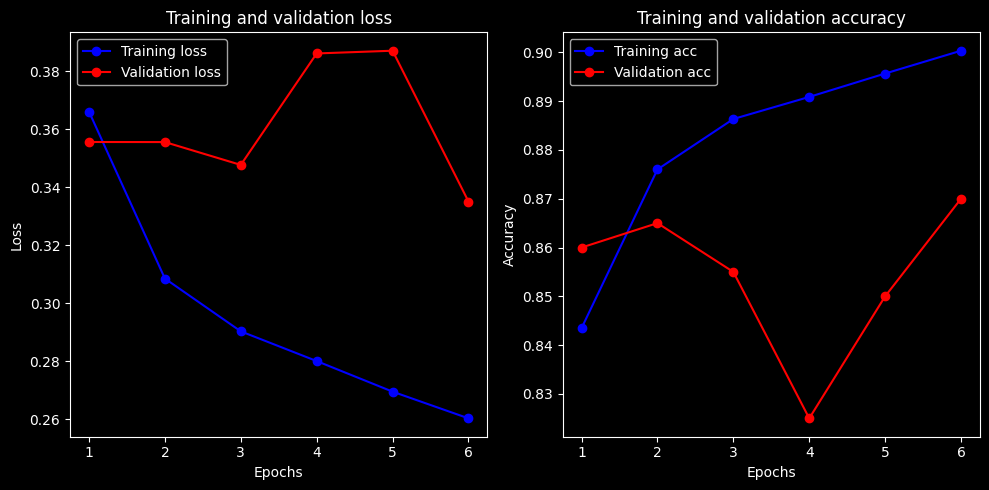

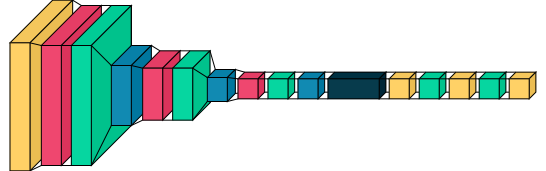

In [14]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization()(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=6)

import visualkeras
visualkeras.layered_view(model)

In [15]:
model.save("prueba_age.h5")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_10 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18432     
                                                                 
 batch_normalization_11 (Bat  (None, 13, 13, 64)       256 

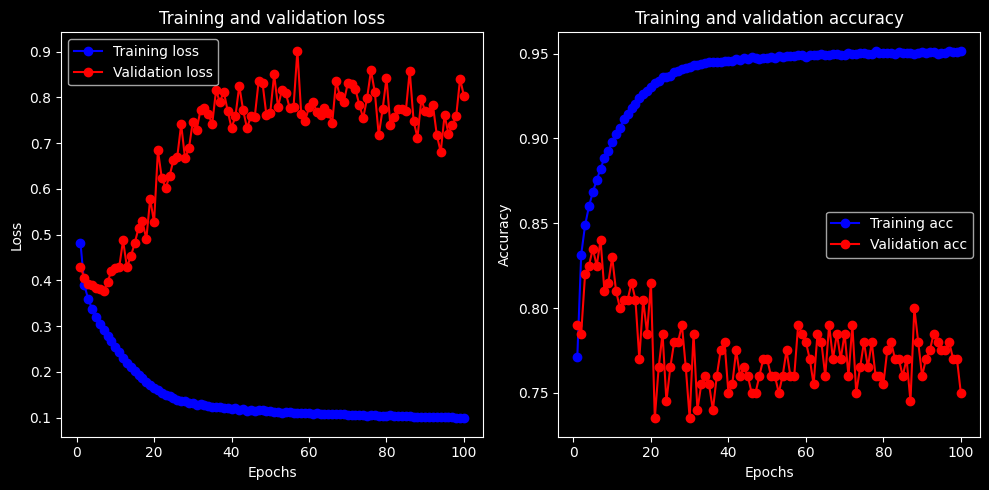

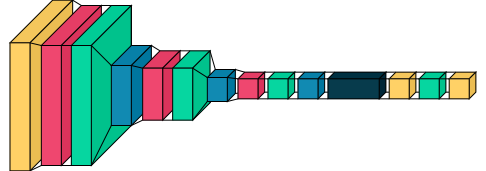

In [16]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)

output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=100)

import visualkeras
visualkeras.layered_view(model)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 30, 30, 64)        1728      
                                                                 
 batch_normalization_42 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 128)       73728     
                                                                 
 batch_normalization_43 (Bat  (None, 13, 13, 128)      512

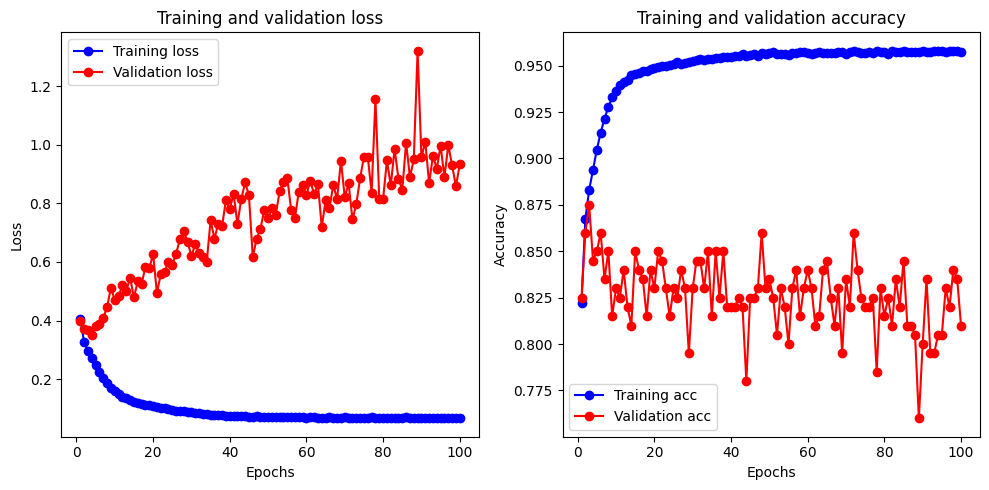

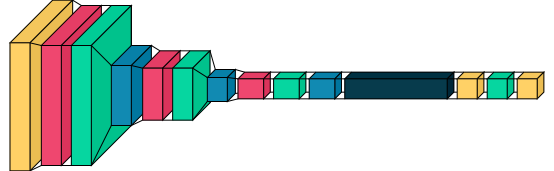

In [25]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(64, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(256, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(8, activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)

output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=100)

import visualkeras
visualkeras.layered_view(model)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 30, 30, 64)        1728      
                                                                 
 batch_normalization_54 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 128)       73728     
                                                                 
 batch_normalization_55 (Bat  (None, 13, 13, 128)      512

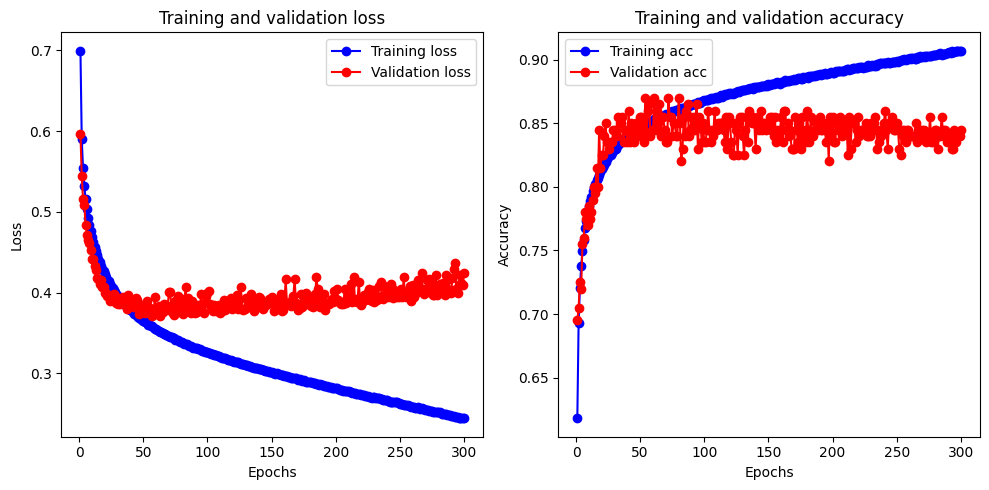

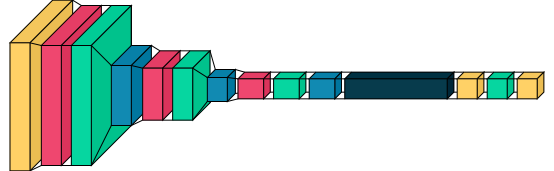

In [28]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(64, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(256, kernel_size=(3, 3), activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(8, activation='sigmoid', use_bias=False)(x)
x = layers.BatchNormalization()(x)

output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=300)

import visualkeras
visualkeras.layered_view(model)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_50 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_51 (Bat  (None, 13, 13, 128)      512

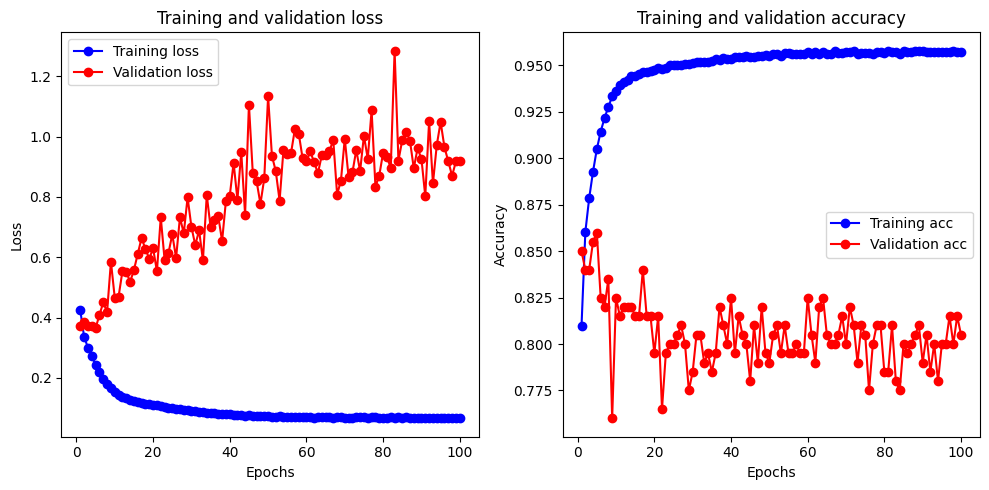

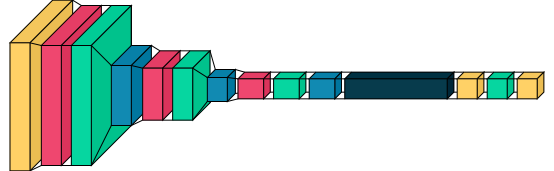

In [27]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(64, kernel_size=(3, 3), activation='sigmoid')(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(256, kernel_size=(3, 3), activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(8, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)

output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=100)

import visualkeras
visualkeras.layered_view(model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         216       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         576       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 8)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        1152      
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 16)       64        
 ormalization)                                               

2023-03-04 17:19:53.533994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-04 17:19:53.906518: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-04 17:19:54.214004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-04 17:19:54.215871: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f47b98b88f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-04 17:19:54.215879: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-03-04 17:19:54.217976: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-04 17:19:54.24986

992/992 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.7760 - val_loss: 0.4225 - val_accuracy: 0.8300
Epoch 2/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3872 - accuracy: 0.8335 - val_loss: 0.4242 - val_accuracy: 0.8150
Epoch 3/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3655 - accuracy: 0.8455 - val_loss: 0.3911 - val_accuracy: 0.8550
Epoch 4/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3515 - accuracy: 0.8529 - val_loss: 0.4052 - val_accuracy: 0.8350
Epoch 5/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3417 - accuracy: 0.8586 - val_loss: 0.3940 - val_accuracy: 0.8550
Epoch 6/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3350 - accuracy: 0.8630 - val_loss: 0.3900 - val_accuracy: 0.8500
Epoch 7/50
992/992 [==============================] - 2s 2ms/step - loss: 0.3293 - accuracy: 0.8657 - val_loss: 0.3872 - val_accuracy: 0.8500
Epoch 8/50
992/99

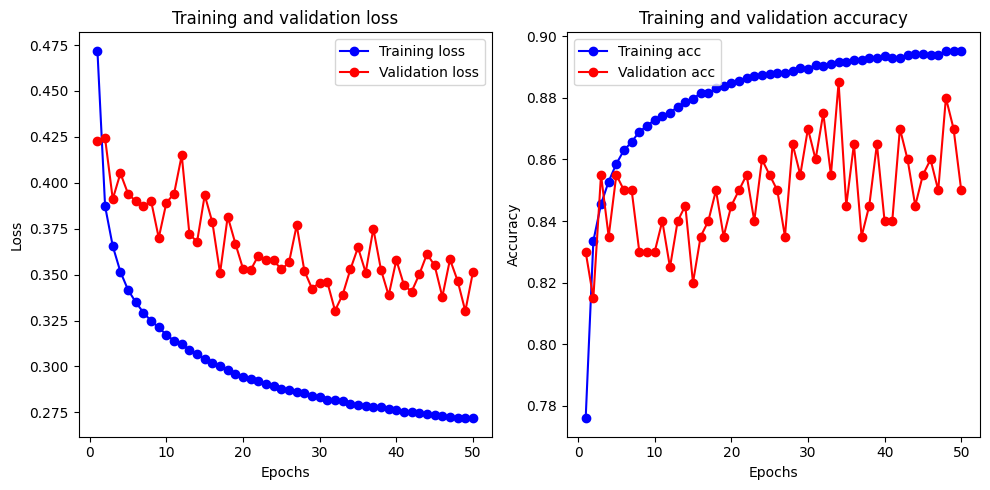

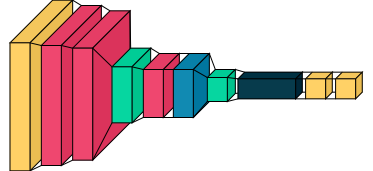

In [13]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 128)       7372

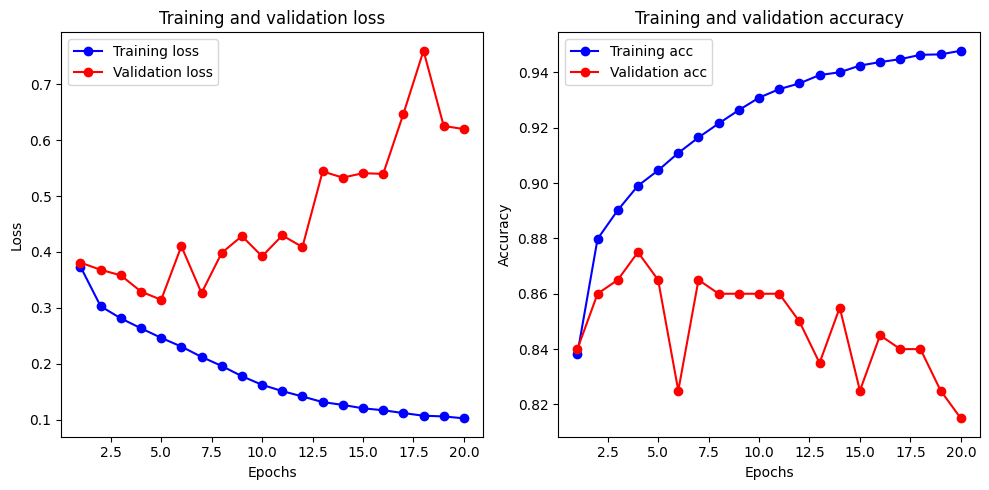

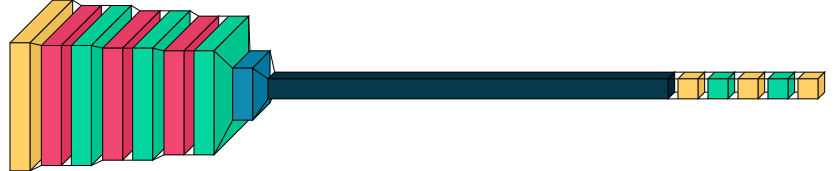

In [14]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Modelo bien bien grande

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       3456      
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 256)       294912    
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 256)      0   

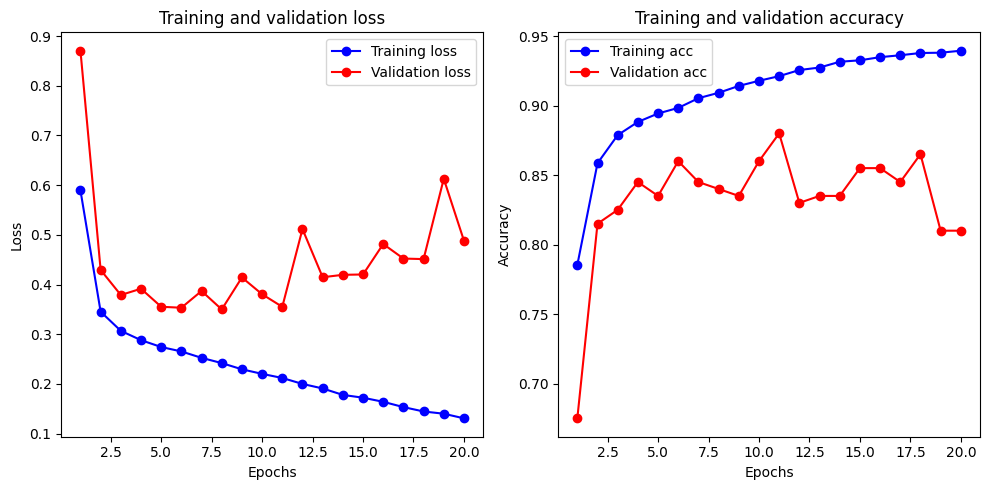

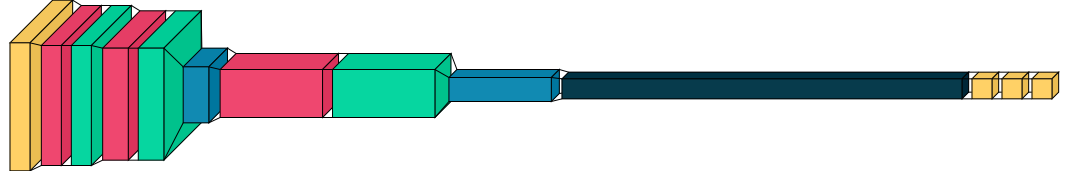

In [15]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(256, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(64, activation='relu', use_bias=False)(x)
x = Dense(64, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

In [16]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(256, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(64, activation='relu', use_bias=False)(x)
x = Dense(64, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=200)

import visualkeras
visualkeras.layered_view(model)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 128)       3456      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 256)       294912    
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0   

KeyboardInterrupt: 

In [ ]:
time.sleep(60)  

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 128)       3456      
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 256)       294912    
                                                                 
 batch_normalization_34 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 12, 12, 1024)      235

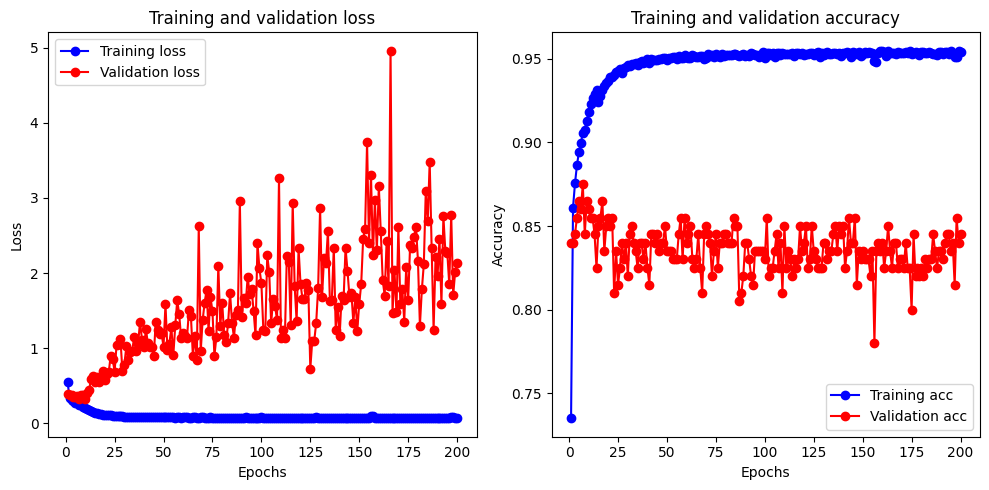

In [ ]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import time
import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(256, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=200)

import visualkeras
visualkeras.layered_view(model)
time.sleep(60)  

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 30, 30, 128)       3456      
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 256)       294912    
                                                                 
 batch_normalization_32 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 1024)      235

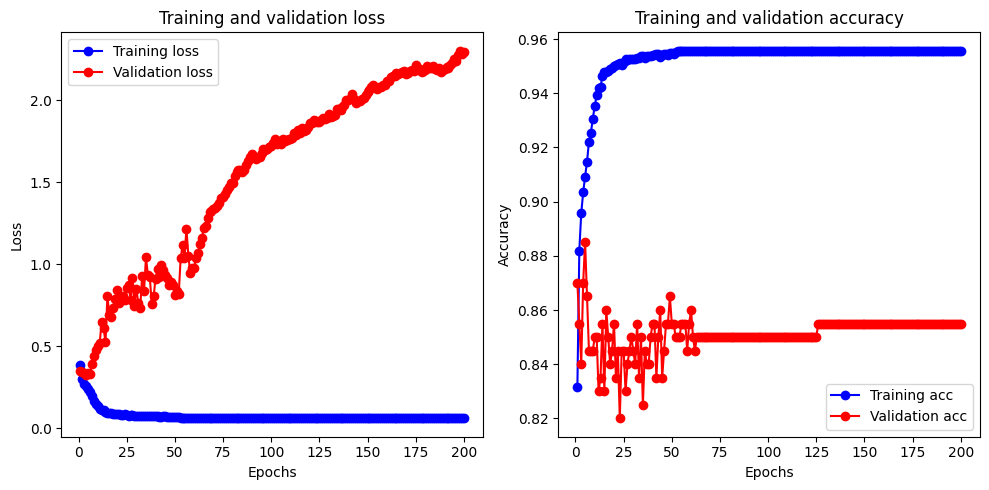

In [ ]:
from keras.callbacks import ReduceLROnPlateau


# Definir un callback para reducir el learning rate si la función de pérdida se estanca
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.00001)

import time
from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam()

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(256, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=200, callbacks=[reduce_lr])

import visualkeras
visualkeras.layered_view(model)
time.sleep(60)  

In [ ]:
from keras.callbacks import ReduceLROnPlateau


# Definir un callback para reducir el learning rate si la función de pérdida se estanca
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0000001)

import time
from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam()

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(256, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(1024, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=200, callbacks=[reduce_lr])

import visualkeras
visualkeras.layered_view(model)
time.sleep(60)  

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 30, 30, 128)       3456      
                                                                 
 conv2d_52 (Conv2D)          (None, 28, 28, 256)       294912    
                                                                 
 batch_normalization_36 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 26, 26, 1024)      2359296   
                                                                 
 batch_normalization_37 (Bat  (None, 26, 26, 1024)     4096      
 chNormalization)                                         

KeyboardInterrupt: 